# Welcome to our Customer Shopping Data   !

<img src = "https://miro.medium.com/max/1400/1*fIdNbG1ZRM9JIitNkTJEfA.png" width="700" height="700">

Attribute Information:

**invoice_no:** Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.

**customer_id:** Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.

**gender:** String variable of the customer's gender.

**age:** Positive Integer variable of the customers age.

**category:** String variable of the category of the purchased product.

**quantity:** The quantities of each product (item) per transaction. Numeric.

**price:** Unit price. Numeric. Product price per unit in Turkish Liras (TL).

**payment_method:** String variable of the payment method (cash, credit card or debit card) used for the transaction.

**invoice_date** Invoice date. The day when a transaction was generated.

**shopping_mall:** String variable of the name of the shopping mall where the transaction was made.

In [2]:
# libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.express as px
from plotly.express import scatter_3d,pie,line
from ipywidgets import interact

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
df = pd.read_csv("customer_shopping_data.csv", parse_dates=['invoice_date'])  
#parse_dates=['invoice_date'] changes date column formats as we see.
df.head(5)

invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card   2022-05-08          Kanyon  
1     Debit Card   2021-12-12  Forum Istanbul  
2           Cash   2021-09-11       Metrocity  
3    Credit Card   2021-05-16    Metropol AVM  
4           Cash   2021-10-24          Kanyon

## Understanding The Variables

**Once I knew all of the variables in the dataset, let's go on getting basic information from dataframe.**

**INSTRUCTIONS**

*   Print shape, len, size and index of the ``DataFrame``
*   Find how many unique values each columns have (known as the ``'nunique'``).
*   Display all columns and their data types (known as the ``'info'``).
*   Get some basic descriptive statistics for all numeric columns (known as the ``'describe'``).
*   Get some basic descriptive statistics for all categoric columns (known as the ``'describe'``).
*   Check for ``missing values``.
*   Check for ``duplicate values``.

...

In [4]:
df.shape

(99457, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [5]:
df.select_dtypes(include='object')

invoice_no customer_id  gender         category payment_method  \
0        I138884     C241288  Female         Clothing    Credit Card   
1        I317333     C111565    Male            Shoes     Debit Card   
2        I127801     C266599    Male         Clothing           Cash   
3        I173702     C988172  Female            Shoes    Credit Card   
4        I337046     C189076  Female            Books           Cash   
...          ...         ...     ...              ...            ...   
99452    I219422     C441542  Female         Souvenir    Credit Card   
99453    I325143     C569580    Male  Food & Beverage           Cash   
99454    I824010     C103292    Male  Food & Beverage     Debit Card   
99455    I702964     C800631    Male       Technology           Cash   
99456    I232867     C273973  Female         Souvenir    Credit Card   

          shopping_mall  
0                Kanyon  
1        Forum Istanbul  
2             Metrocity  
3          Metropol AVM  
4                Kanyon  
...                 ...  
99452            Kanyon  
99453    Forum Istanbul  
99454         Metrocity  
99455      Istinye Park  
99456  Mall of Istanbul  

[99457 rows x 6 columns]

In [9]:
df.describe(include=object).T

count unique               top   freq
invoice_no      99457  99457           I138884      1
customer_id     99457  99457           C241288      1
gender          99457      2            Female  59482
category        99457      8          Clothing  34487
payment_method  99457      3              Cash  44447
shopping_mall   99457     10  Mall of Istanbul  19943

<font color='green'>We can see quickly that **"Mall of Istanbul"** is a popular shopping center, with **"Clothing"** being the most popular category and **"Cash"** the most popular payment option.</font>

In [10]:
df.select_dtypes(exclude='object')

age  quantity    price invoice_date
0       28         5  1500.40   2022-05-08
1       21         3  1800.51   2021-12-12
2       20         1   300.08   2021-09-11
3       66         5  3000.85   2021-05-16
4       53         4    60.60   2021-10-24
...    ...       ...      ...          ...
99452   45         5    58.65   2022-09-21
99453   27         2    10.46   2021-09-22
99454   63         2    10.46   2021-03-28
99455   56         4  4200.00   2021-03-16
99456   36         3    35.19   2022-10-15

[99457 rows x 4 columns]

In [45]:
# no null value
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [46]:
df.duplicated().sum()
#We don't have duplicate row

0

In [8]:
object_col=df.select_dtypes('object').columns
object_col

Index(['invoice_no', 'customer_id', 'gender', 'category', 'payment_method',
       'shopping_mall'],
      dtype='object')

In [9]:
for col in object_col:
    print(col)
    print("--"*20)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

invoice_no
----------------------------------------
I138884    1
I291671    1
I175779    1
I226143    1
I683818    1
          ..
I319287    1
I173400    1
I828064    1
I194850    1
I232867    1
Name: invoice_no, Length: 99457, dtype: int64
----------------------------------------
customer_id
----------------------------------------
C241288    1
C116138    1
C382765    1
C285074    1
C405356    1
          ..
C220083    1
C286933    1
C301304    1
C214184    1
C273973    1
Name: customer_id, Length: 99457, dtype: int64
----------------------------------------
gender
----------------------------------------
Female    59482
Male      39975
Name: gender, dtype: int64
----------------------------------------
category
----------------------------------------
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64
-------

#### Number of unique values in each column

In [11]:
[print(f"{i:<20}:  ", i,"column has",df[i].nunique(),"unique values") for i in df.columns]

invoice_no          :   invoice_no column has 99457 unique values
customer_id         :   customer_id column has 99457 unique values
gender              :   gender column has 2 unique values
age                 :   age column has 52 unique values
category            :   category column has 8 unique values
quantity            :   quantity column has 5 unique values
price               :   price column has 40 unique values
payment_method      :   payment_method column has 3 unique values
invoice_date        :   invoice_date column has 797 unique values
shopping_mall       :   shopping_mall column has 10 unique values


[None, None, None, None, None, None, None, None, None, None]

In [15]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

invoice_no                    : ['I138884' 'I317333' 'I127801' ... 'I824010' 'I702964' 'I232867']
customer_id                   : ['C241288' 'C111565' 'C266599' ... 'C103292' 'C800631' 'C273973']
gender                        : ['Female' 'Male']
category                      : ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
payment_method                : ['Credit Card' 'Debit Card' 'Cash']
shopping_mall                 : ['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']


## Outlier Control

In [13]:
import plotly.express as px
def column_histogram(col):
    fig = px.box(df,
                       x=col   )
    fig.show()
cols =  df.columns

interact(column_histogram,col=cols);

interactive(children=(Dropdown(description='col', options=('invoice_no', 'customer_id', 'gender', 'age', 'cate…

<font color='green'>Although the price column seems to have outliers,we are not evalueted it has outliers. Because real world data can be inside extreme values. <\font>

# Feature Engineering

## Total Price 

In [4]:
df.head(1)

invoice_no customer_id  gender  age  category  quantity   price  \
0    I138884     C241288  Female   28  Clothing         5  1500.4   

  payment_method invoice_date shopping_mall  
0    Credit Card   2022-05-08        Kanyon

In [14]:
df["total_price"] = df["price"] * df["quantity"]
df["total_price"] 
#we get the new column named "total_price".

0         7502.00
1         5401.53
2          300.08
3        15004.25
4          242.40
           ...   
99452      293.25
99453       20.92
99454       20.92
99455    16800.00
99456      105.57
Name: total_price, Length: 99457, dtype: float64

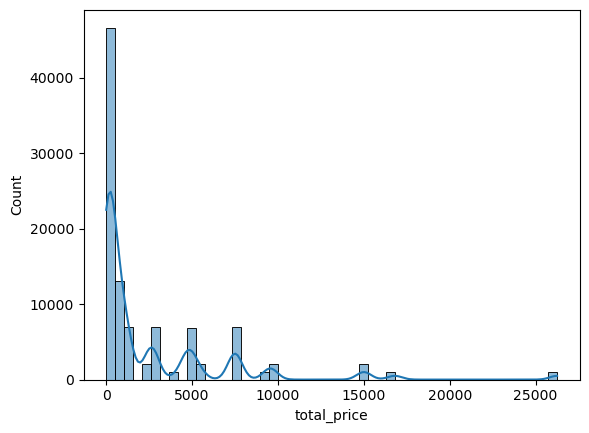

In [15]:
sns.histplot(df.total_price, bins=50, kde=True);

## "day","month","year"

In [16]:
df['day'] = df.invoice_date.dt.day
df['month'] = df.invoice_date.dt.month
df['year'] = df.invoice_date.dt.year 

In [17]:
df["year_month"] = df.invoice_date.dt.strftime("%Y-%m")


In [38]:
df["weekday_end"] = df["day"].apply(lambda x : "weekday" if x in [1,2,3,4,5] else "weekend")#0 equal sunday

In [39]:
df.head()

invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  total_price  day  month  year  \
0    Credit Card   2022-05-08          Kanyon      7502.00    8      5  2022   
1     Debit Card   2021-12-12  Forum Istanbul      5401.53   12     12  2021   
2           Cash   2021-09-11       Metrocity       300.08   11      9  2021   
3    Credit Card   2021-05-16    Metropol AVM     15004.25   16      5  2021   
4           Cash   2021-10-24          Kanyon       242.40   24     10  2021   

  year_month weekday_end  
0    2022-05     weekend  
1    2021-12     weekend  
2    2021-09     weekend  
3    2021-05     weekend  
4    2021-10     weekend

''

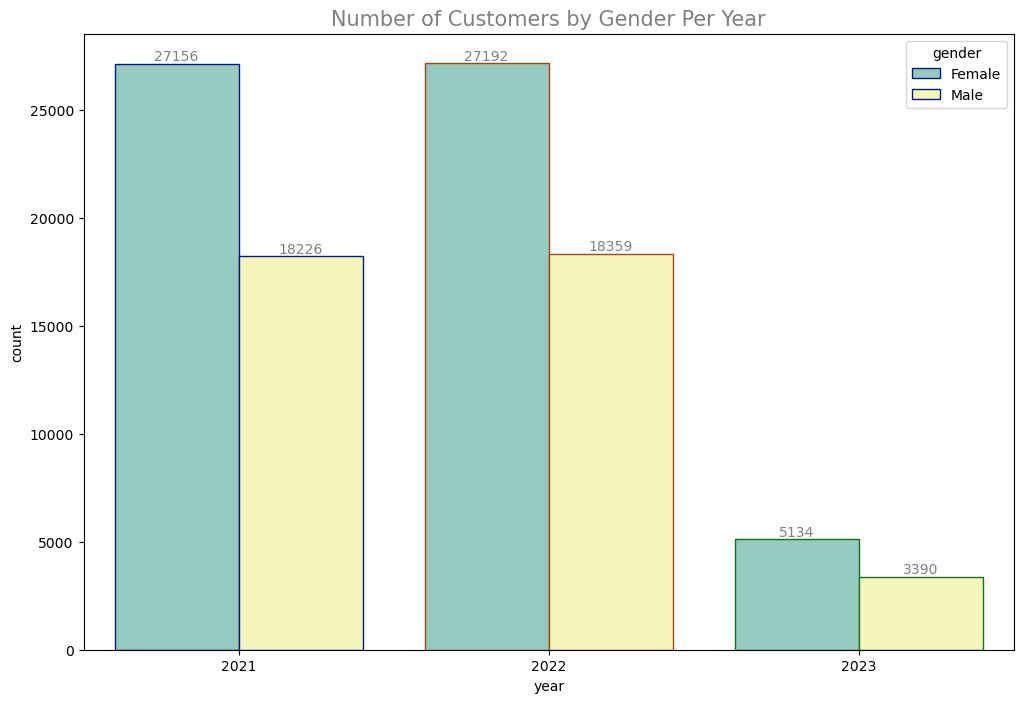

In [19]:
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.countplot(x="year", data=df, hue ="gender", palette="Set3", edgecolor=sns.color_palette("dark", 3))
ax.bar_label(ax.containers[0],color="grey", size=10)
ax.bar_label(ax.containers[1],color="grey", size=10)
plt.title('Number of Customers by Gender Per Year',size =15 , color ="grey")
;

**When we look at the years ,female customers are more than male customers**

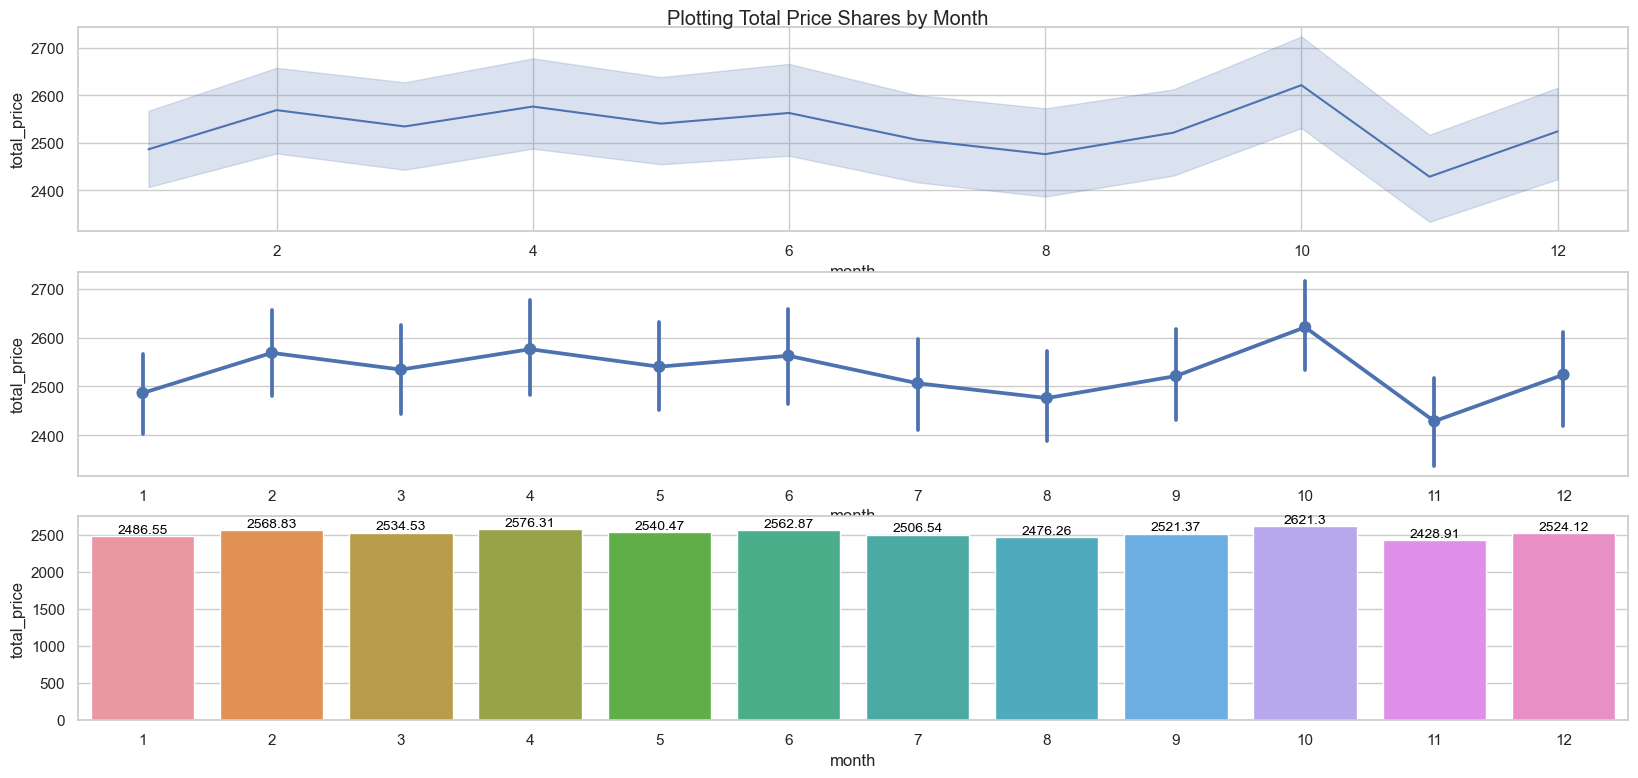

In [96]:
fig= plt.figure(figsize=(20,9))
fig.suptitle("Plotting Total Price Shares by Month", y = 0.9)
plt.subplot(3,1,1) #1
sns.lineplot(x=df.month, y=df.total_price)

plt.subplot(3,1,2) #2
sns.pointplot(x=df.month, y=df.total_price)

plt.subplot(3,1,3) #3
ax=sns.barplot(x=df.month, y=df.total_price, ci=None)
ax.bar_label(ax.containers[0],color="black",size=10);

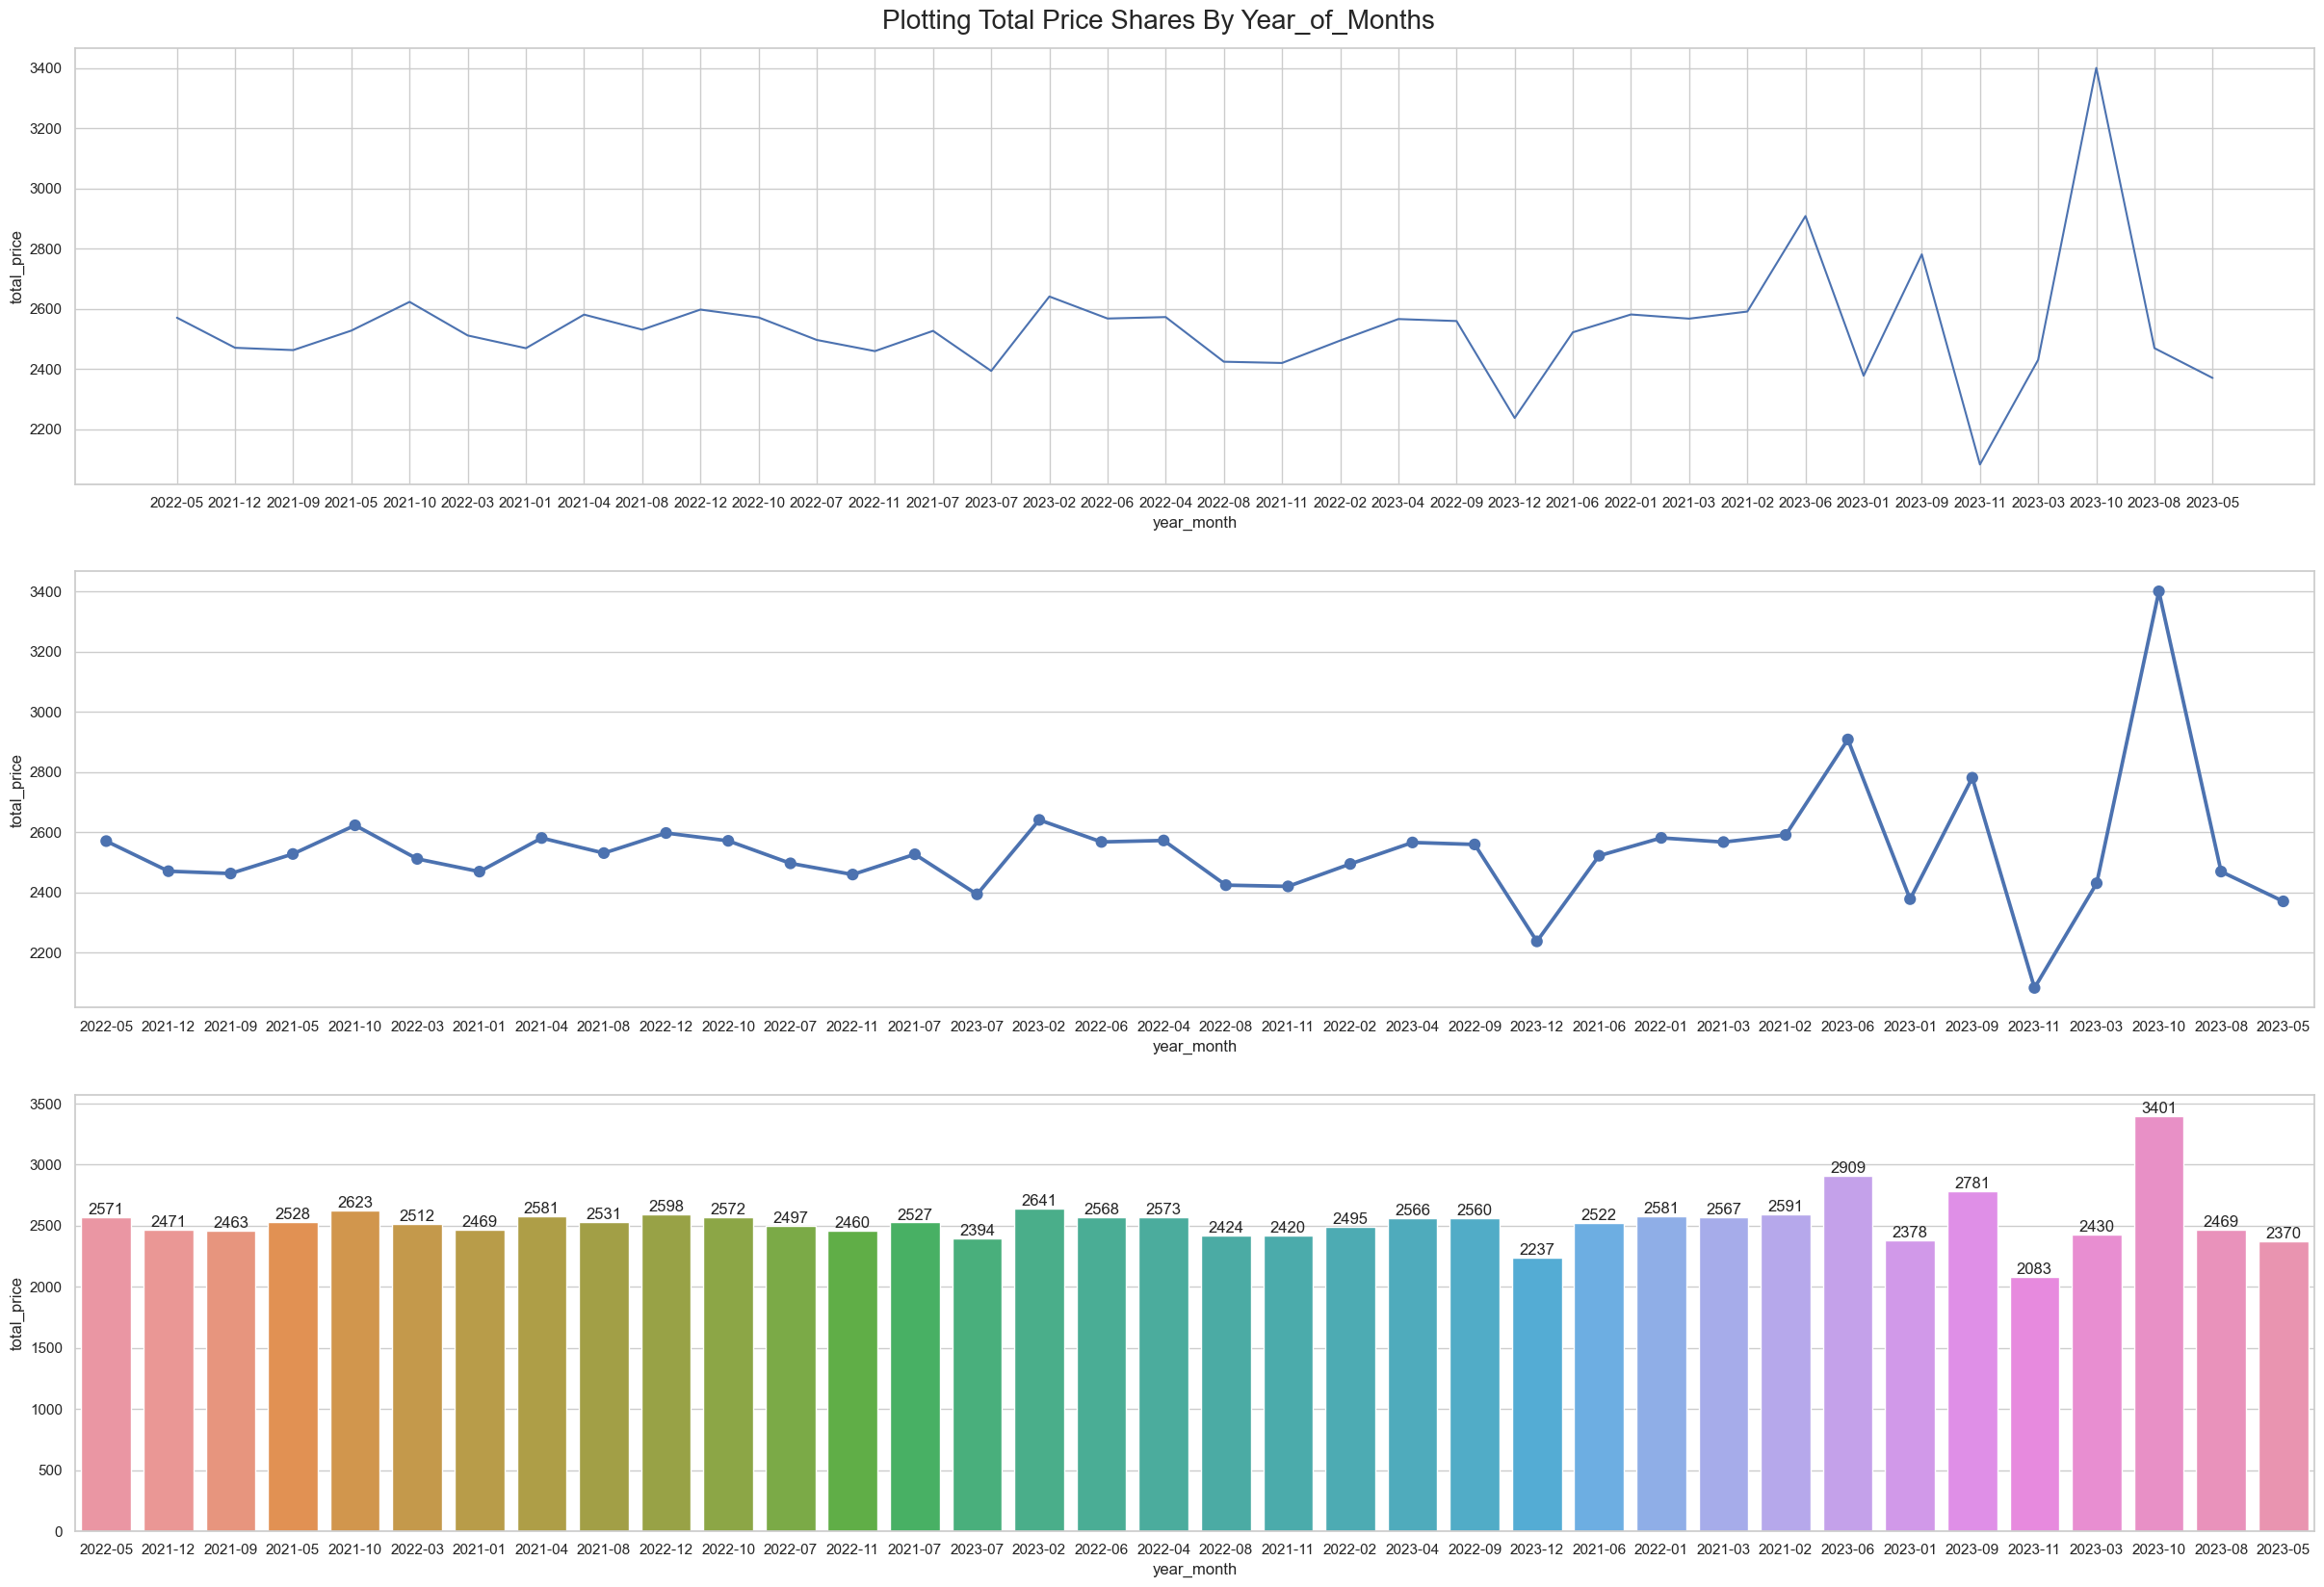

In [102]:
fig, ax = plt.subplots(nrows= 3, ncols = 1, figsize=(30,20))
fig.suptitle("Plotting Total Price Shares By Year_of_Months", y = 0.9, fontsize = 20)
sns.lineplot(x = df.year_month, y = df.total_price, ax = ax[0], ci = None)
sns.pointplot(x = df.year_month, y = df.total_price, ax = ax[1], ci = None)
sns.barplot(x = df.year_month, y = df.total_price, ax = ax[2], ci = None)
for container in ax[2].containers:
    ax[2].bar_label(container, fmt="%.0f", fontsize=12);

In [22]:
dom= pd.DataFrame(df.groupby("day").total_price.mean().apply(lambda x: round(x))).rename_axis("dom")
dom.T #day of mounth

dom            1     2     3     4     5     6     7     8     9     10  ...  \
total_price  2499  2505  2489  2345  2565  2476  2636  2613  2599  2602  ...   

dom            22    23    24    25    26    27    28    29    30    31  
total_price  2551  2515  2454  2408  2559  2568  2656  2529  2569  2424  

[1 rows x 31 columns]

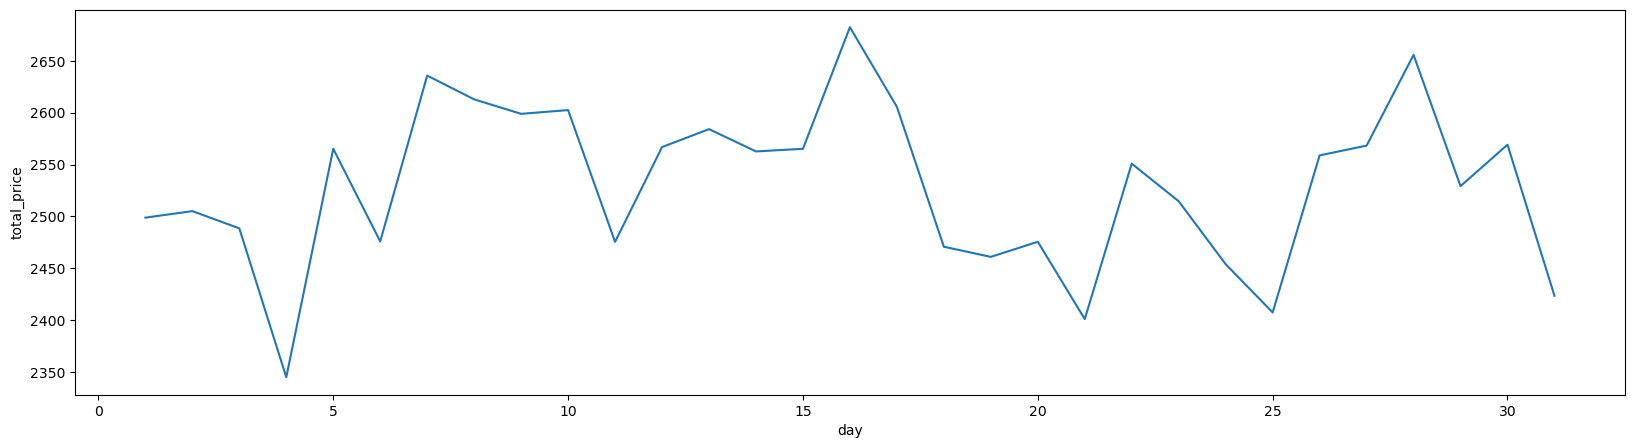

In [23]:
fig = plt.figure(figsize=(20,5))
sns.lineplot(x = df.day, y = df.total_price, ci = None);

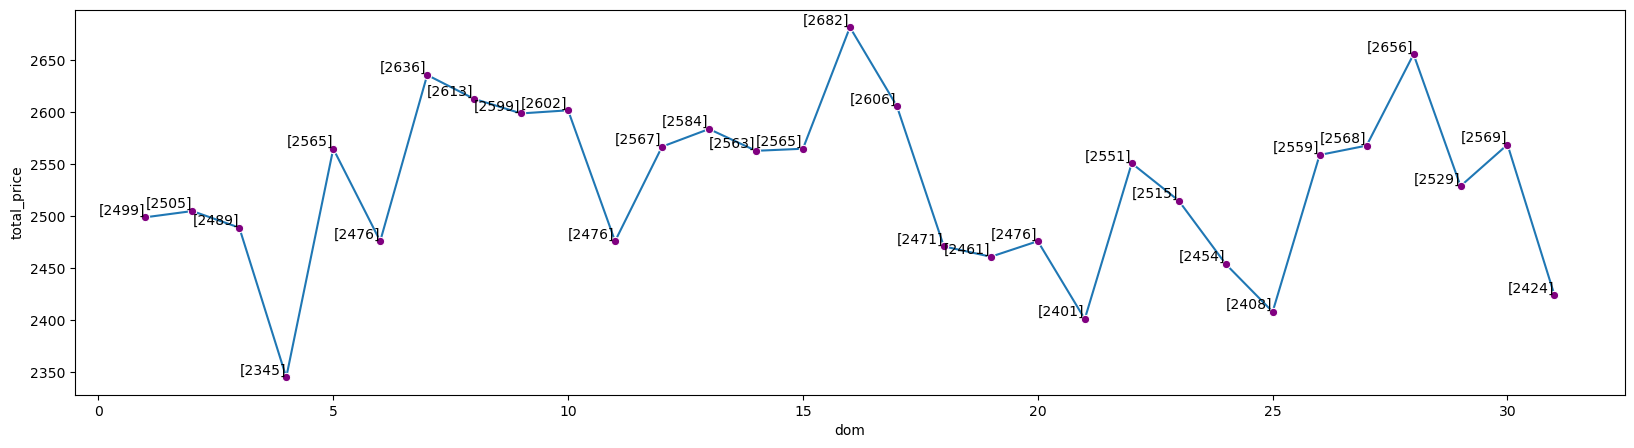

In [26]:
fig = plt.figure(figsize=(20,5))

sns.lineplot(x = dom.index, y = dom.total_price, ls="-", marker="o", markerfacecolor="purple")

for index, value in enumerate(dom.values):
    plt.text(index, value, str(value), va="bottom", ha="left")

In [40]:
df.weekday_end.value_counts()

weekend    80511
weekday    18946
Name: weekday_end, dtype: int64

In [51]:
df.groupby("weekday_end").customer_id.count()

weekday_end
weekday    18946
weekend    80511
Name: customer_id, dtype: int64

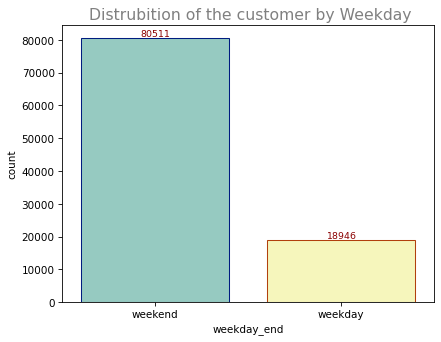

In [61]:
plt.figure(dpi = 75)
ax = sns.countplot(x= df.weekday_end,data=df,  palette="Set3", edgecolor=sns.color_palette("dark", 3))
for i in ax.containers: ax.bar_label(i,color="darkred",fontsize=9)
plt.title(" Distrubition of the customer by Weekday",size =15 , color ="grey");

''

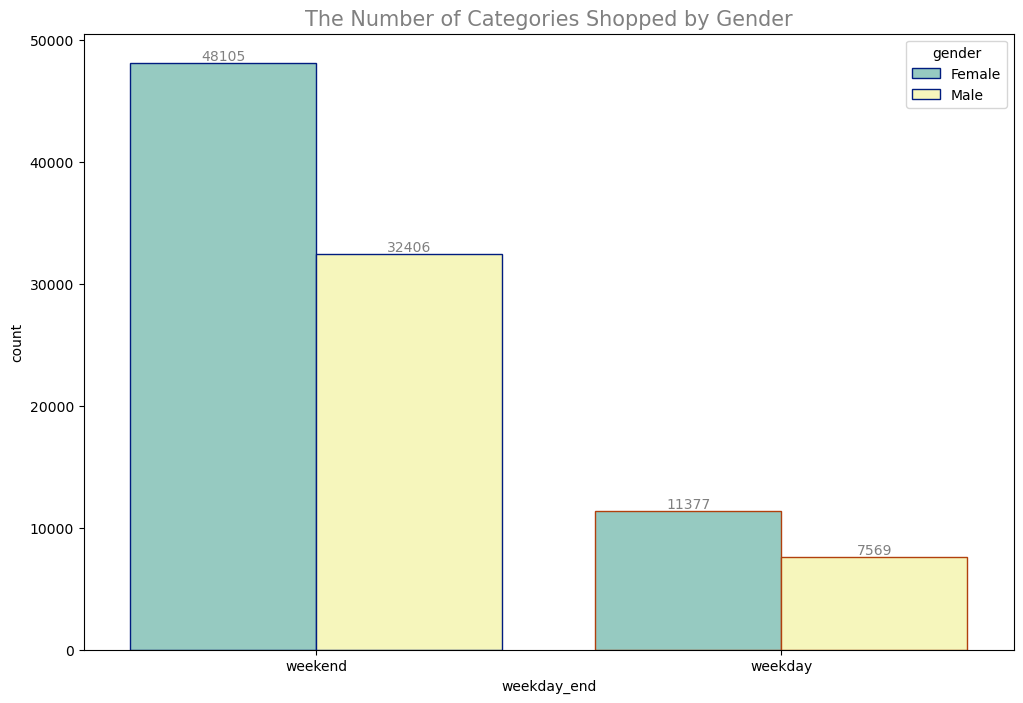

In [44]:
#sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.countplot(x="weekday_end", data=df, hue ="gender", palette="Set3", edgecolor=sns.color_palette("dark", 3))
ax.bar_label(ax.containers[0], color="grey", size=10)
ax.bar_label(ax.containers[1], color="grey", size=10)
plt.title(' by Gender',size =15 , color ="grey")
;

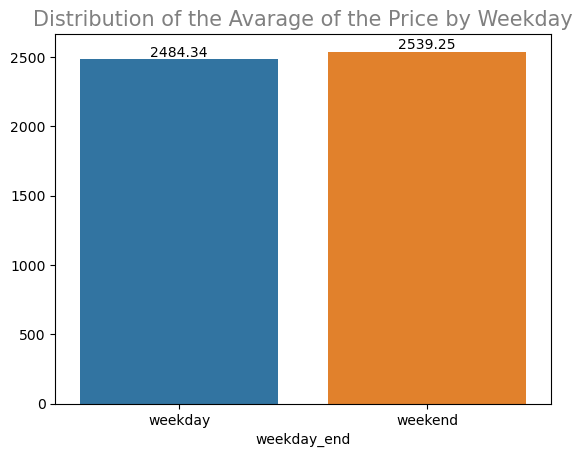

In [62]:
plt.figure(dpi = 100)
ax=sns.barplot(x = df.groupby("weekday_end")["total_price"].mean().index ,
               y=df.groupby("weekday_end")["total_price"].mean().values)
for i in ax.containers: ax.bar_label(i)

plt.title("Distribution of the Avarage of the Price by Weekday",size =15 , color ="grey");

<font color='green'> The amount of customers shopping on the weekend is much higher than during the week.However, the amount of price is very close to each other
    
hafta sonu alışveriş yapan müşteri miktarı hafta içinden çok daha fazladır. Buna ragmen harcama miktarları birbirine cok yakındır.


# "invoice_no " column

In [53]:
df["invoice_no"].value_counts()

I138884    1
I291671    1
I175779    1
I226143    1
I683818    1
          ..
I319287    1
I173400    1
I828064    1
I194850    1
I232867    1
Name: invoice_no, Length: 99457, dtype: int64

# "customer_id" column

In [54]:
df["customer_id"].value_counts()

C241288    1
C116138    1
C382765    1
C285074    1
C405356    1
          ..
C220083    1
C286933    1
C301304    1
C214184    1
C273973    1
Name: customer_id, Length: 99457, dtype: int64

In [26]:
df.groupby("customer_id")["invoice_no"].count().mean()

#Data contains a unique invoice number for each customer. 

1.0

# "gender" column

In [55]:
df["gender"].value_counts()

Female    59482
Male      39975
Name: gender, dtype: int64

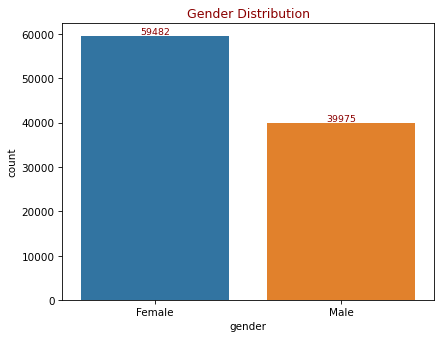

In [56]:
plt.figure(dpi = 75)
ax = sns.countplot(df["gender"])
for i in ax.containers: ax.bar_label(i,color="darkred",fontsize=9)
plt.title("Gender Distribution",fontdict={"color":"darkred"});

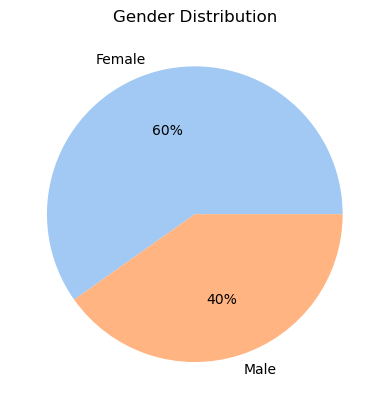

In [30]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie( df["gender"].value_counts(normalize =True),colors = colors, autopct='%.0f%%',labels=["Female","Male"])
plt.title("Gender Distribution",fontdict={"color":"black"});
plt.show()

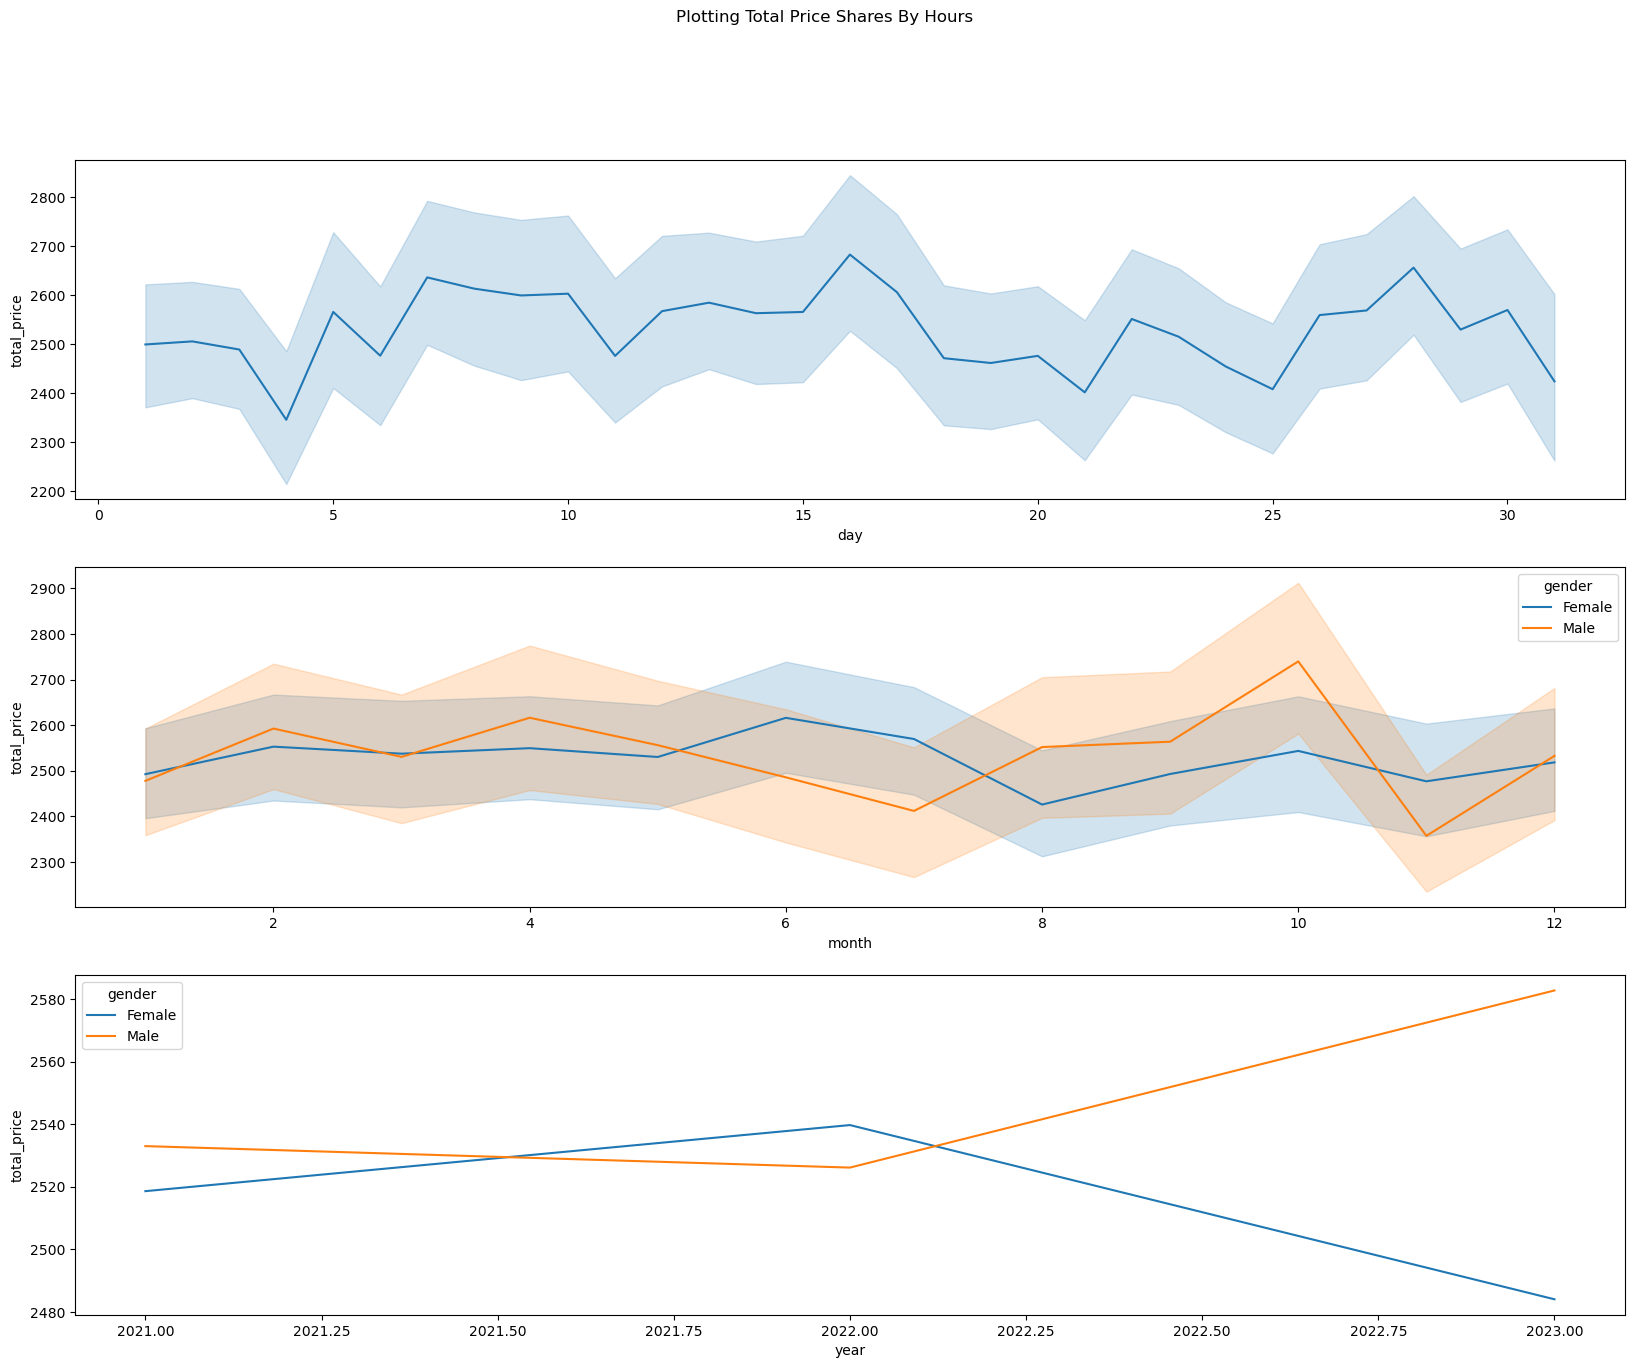

In [31]:
fig= plt.figure(figsize=(20,15))
fig.suptitle("Plotting Total Price Shares By Hours")

plt.subplot(3,1,1)
sns.lineplot(x=df.day,y=df.total_price)

plt.subplot(3,1,2)
sns.lineplot(x=df.month,y=df.total_price, hue=df.gender)

plt.subplot(3,1,3)
sns.lineplot(x=df.year,y=df.total_price, hue=df.gender, ci = None);


In [87]:
df.groupby("gender")["category"].value_counts()

gender  category       
Female  Clothing           20652
        Cosmetics           9070
        Food & Beverage     8804
        Toys                6085
        Shoes               5967
        Souvenir            3017
        Technology          2981
        Books               2906
Male    Clothing           13835
        Cosmetics           6027
        Food & Beverage     5972
        Shoes               4067
        Toys                4002
        Books               2075
        Technology          2015
        Souvenir            1982
Name: category, dtype: int64

In [88]:
df.groupby("category")["gender"].value_counts()

category         gender
Books            Female     2906
                 Male       2075
Clothing         Female    20652
                 Male      13835
Cosmetics        Female     9070
                 Male       6027
Food & Beverage  Female     8804
                 Male       5972
Shoes            Female     5967
                 Male       4067
Souvenir         Female     3017
                 Male       1982
Technology       Female     2981
                 Male       2015
Toys             Female     6085
                 Male       4002
Name: gender, dtype: int64

''

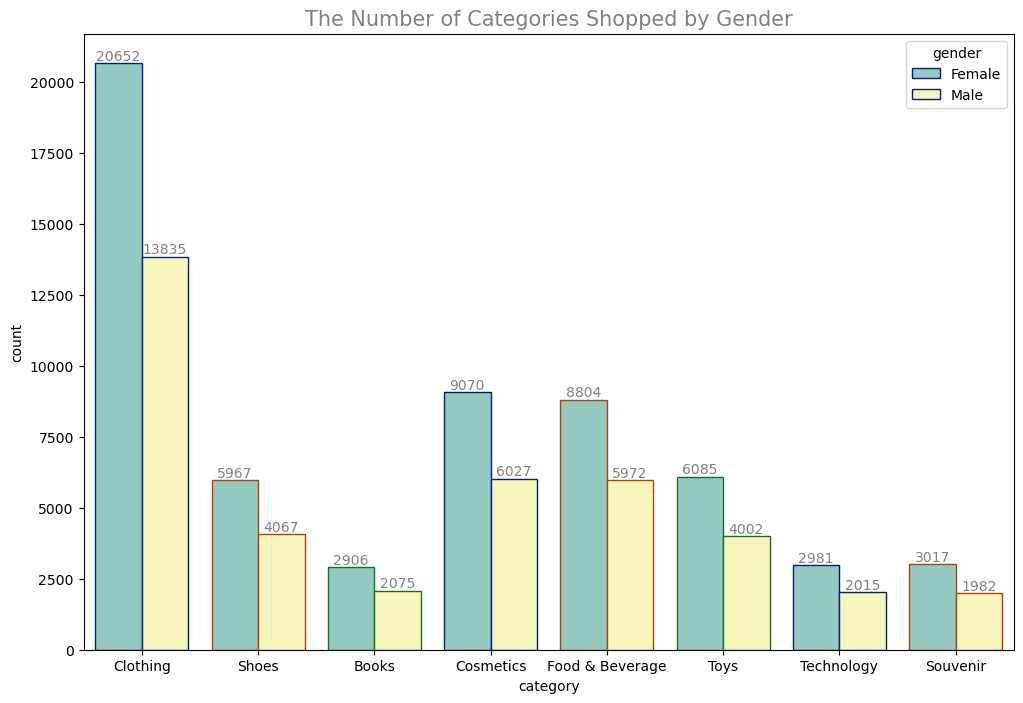

In [34]:
#sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.countplot(x="category", data=df, hue ="gender", palette="Set3", edgecolor=sns.color_palette("dark", 3))
ax.bar_label(ax.containers[0], color="grey", size=10)
ax.bar_label(ax.containers[1], color="grey", size=10)
plt.title('The Number of Categories Shopped by Gender',size =15 , color ="grey")
;

# "payment_method" column

In [92]:
df.groupby("gender")["payment_method"].value_counts()

gender  payment_method
Female  Cash              26509
        Credit Card       21011
        Debit Card        11962
Male    Cash              17938
        Credit Card       13920
        Debit Card         8117
Name: payment_method, dtype: int64

''

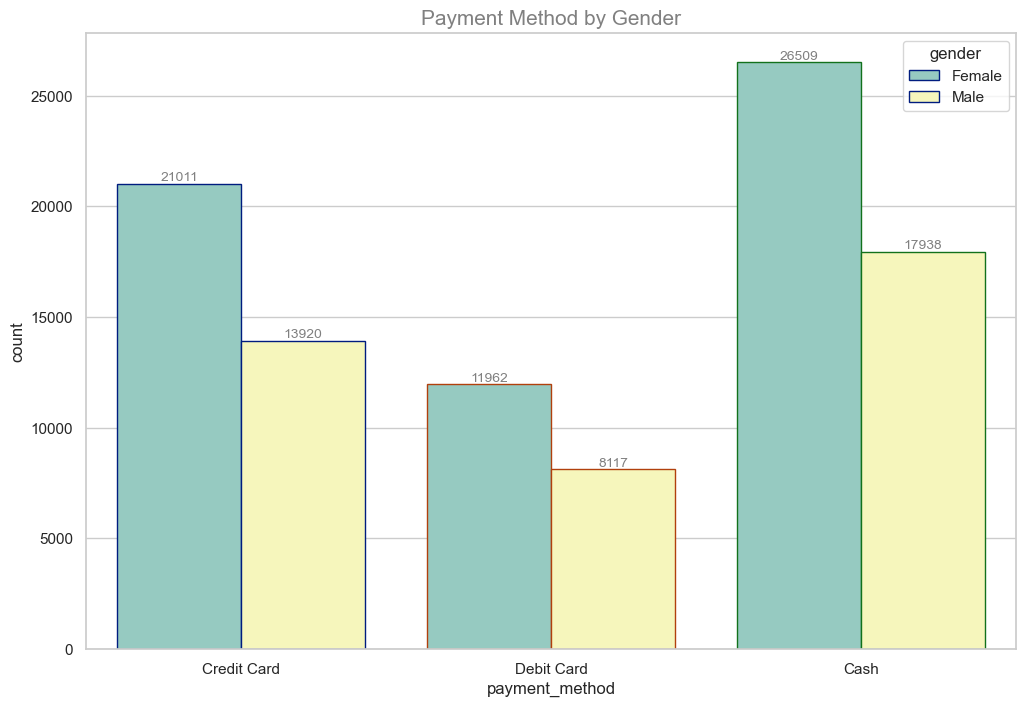

In [188]:
#sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.countplot(x="payment_method", data=df, hue ="gender", palette="Set3", edgecolor=sns.color_palette("dark", 3))
ax.bar_label(ax.containers[0], color="grey", size=10)
ax.bar_label(ax.containers[1], color="grey", size=10)
plt.title('Payment Method by Gender',size =15 , color ="grey")
;

''

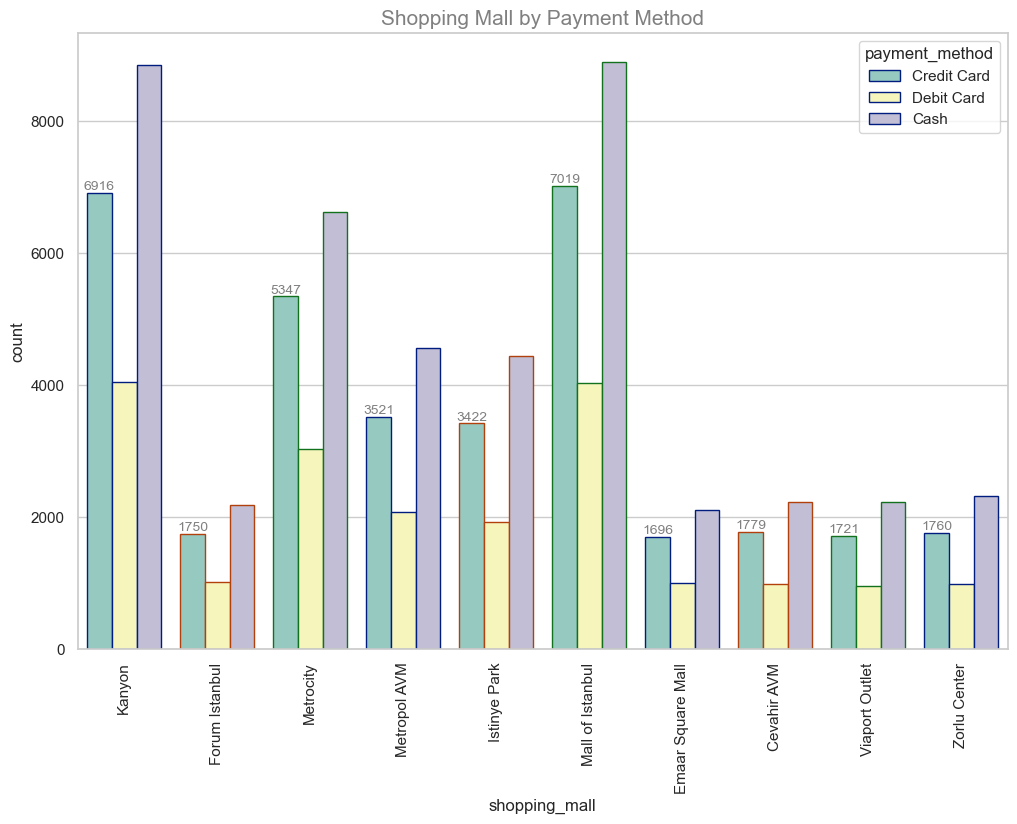

In [195]:
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.countplot(x="shopping_mall", data=df, hue ="payment_method", palette="Set3", edgecolor=sns.color_palette("dark", 3))
ax.bar_label(ax.containers[0], color="grey", size=10)
plt.title('Shopping Mall by Payment Method',size =15 , color ="grey")
plt.xticks(rotation=90);

# "category" colums

In [97]:
df["category"].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

''

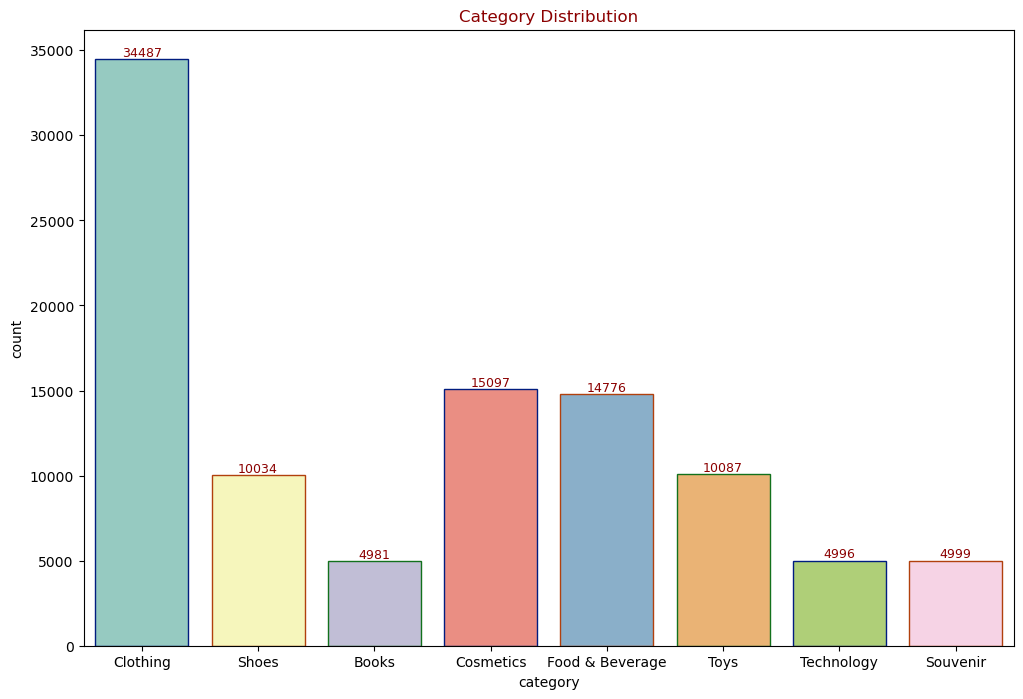

In [35]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df["category"], palette="Set3", edgecolor=sns.color_palette("dark", 3))
for i in ax.containers: ax.bar_label(i,color="darkred",fontsize=9)
plt.title("Category Distribution",fontdict={"color":"darkred"})
;

''

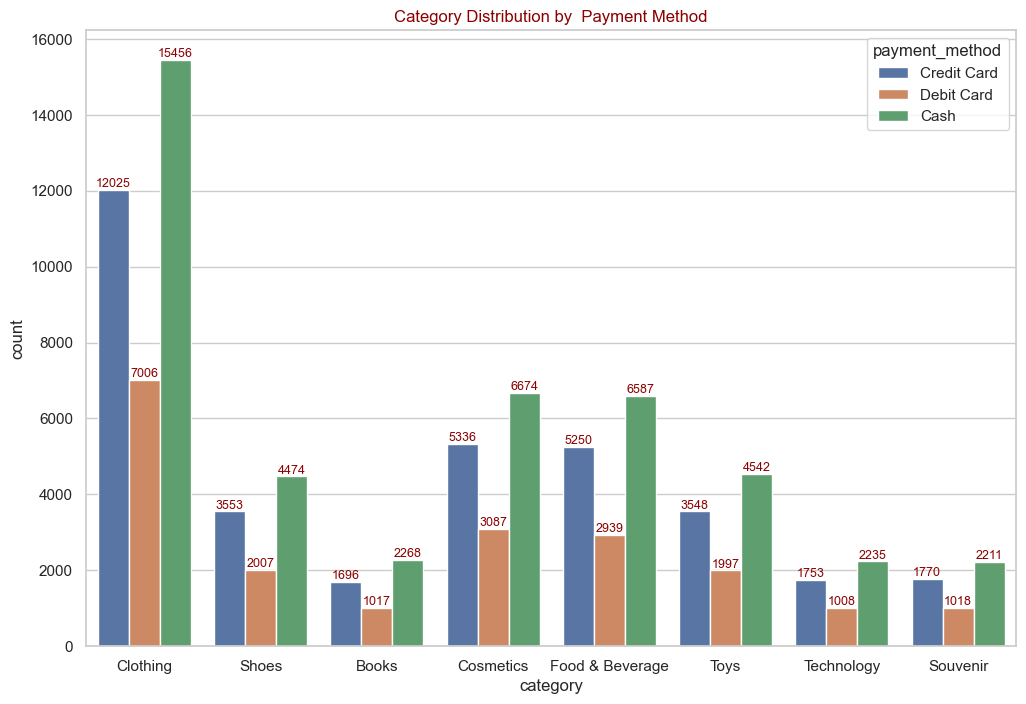

In [196]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = df["category"], hue = df["payment_method"])
for i in ax.containers: ax.bar_label(i,color="darkred",fontsize=9)
plt.title("Category Distribution by  Payment Method",fontdict={"color":"darkred"})
;

''

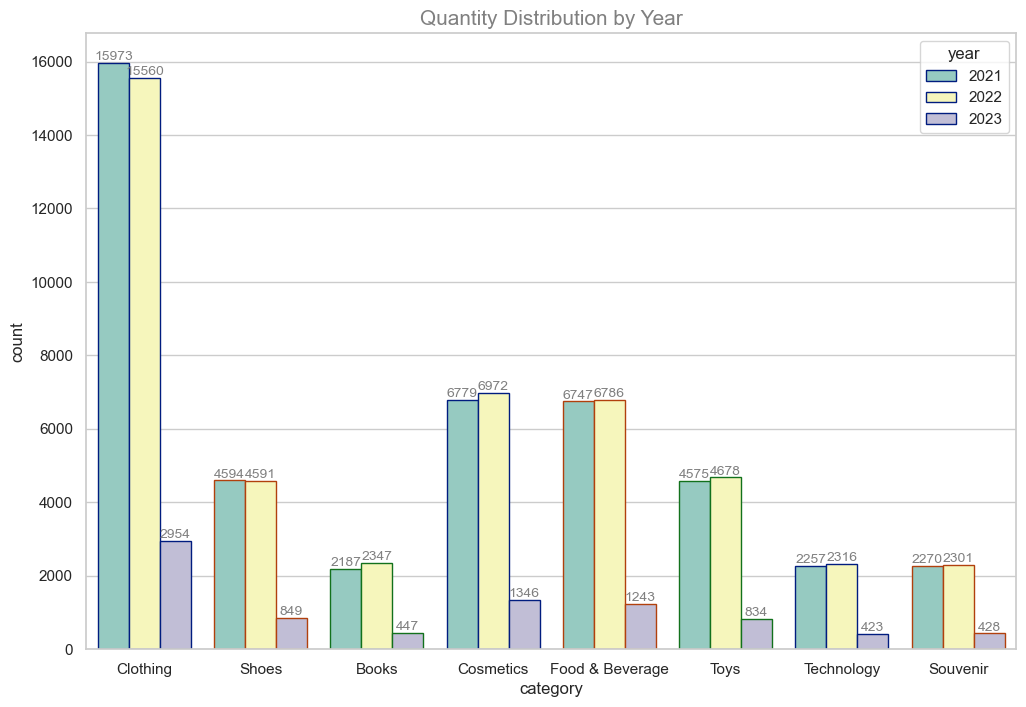

In [197]:
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.countplot(x="category", data=df, hue=df.year ,palette="Set3", edgecolor=sns.color_palette("dark", 3))
ax.bar_label(ax.containers[0], color="grey", size=10)
ax.bar_label(ax.containers[1], color="grey", size=10)
ax.bar_label(ax.containers[2], color="grey", size=10)
plt.title('Quantity Distribution by Year',size =15 , color ="grey")
;

<font color='green'> We can see which products customers have sold the most or least of over time</font>

# "quantity" colums

In [105]:
df["quantity"].value_counts()

3    20149
5    19990
2    19828
1    19767
4    19723
Name: quantity, dtype: int64

In [204]:
df.groupby("category").quantity.mean()

category
Books              3.007830
Clothing           3.002813
Cosmetics          3.011525
Food & Beverage    2.996548
Shoes              3.011461
Souvenir           2.974795
Technology         3.006605
Toys               3.005948
Name: quantity, dtype: float64

# "shopping_mall"

In [147]:
df.shopping_mall.value_counts()

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

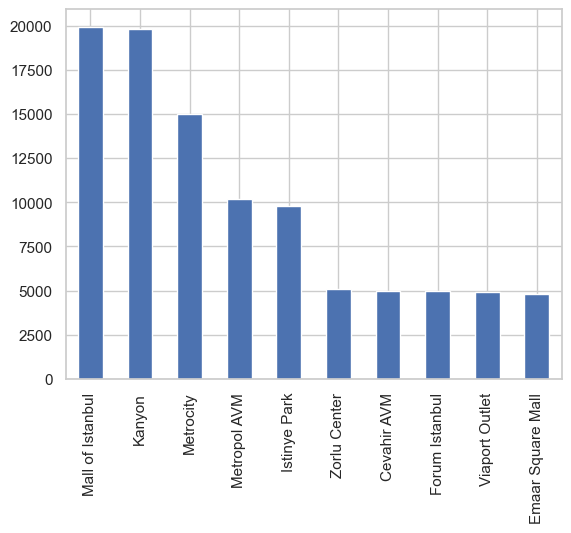

In [150]:
df.shopping_mall.value_counts().plot(kind="bar");

In [36]:

fig = px.histogram(x = df.shopping_mall,
                   y= df.total_price)
fig.show()
